# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [1]:
# Install the required libraries
!pip install prophet

In [2]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [3]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

<ipython-input-3-217fb1a948ac>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [4]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


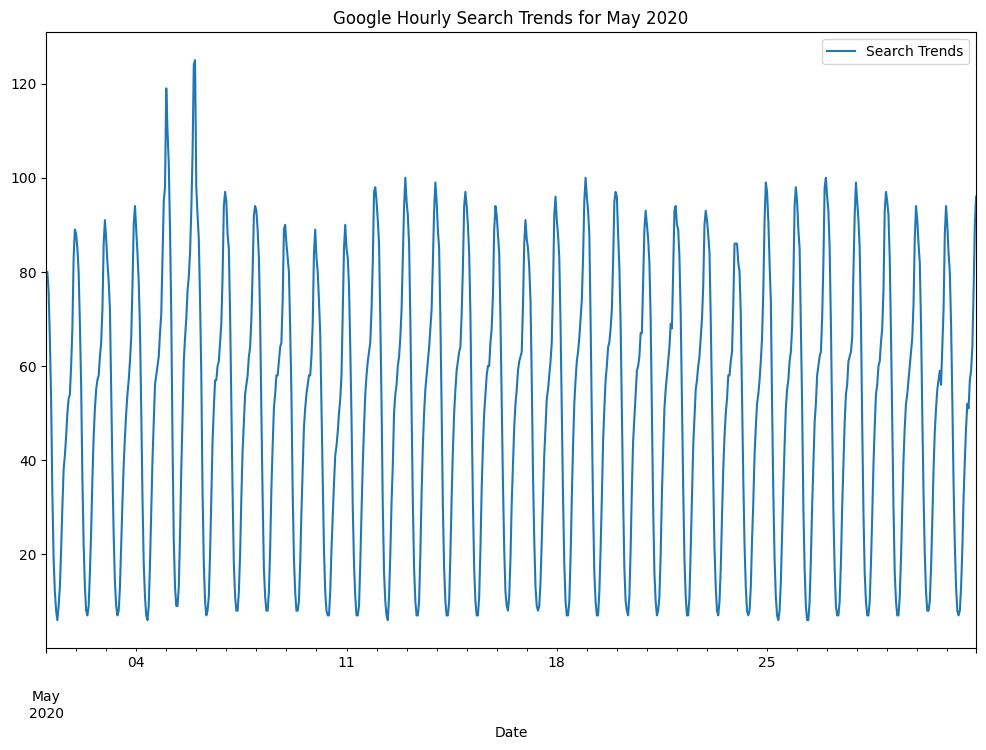

In [5]:
# Slice the DataFrame to just the month of May 2020

df_mercado_trends_may_2020 = df_mercado_trends.loc['2020-05-01':'2020-05-31']

# Plot to visualize the data for May 2020

df_mercado_trends_may_2020.plot(figsize=(12, 8), title='Google Hourly Search Trends for May 2020')
plt.show()

#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [6]:
# Calculate the sum of the total search traffic for May 2020
df_mercado_trends_may_2020.loc[:, 'traffic_may_2020'] = df_mercado_trends_may_2020.sum(axis=1)

# View the traffic_may_2020 column
display(df_mercado_trends_may_2020['traffic_may_2020'])


<ipython-input-6-a748e802a7b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mercado_trends_may_2020.loc[:, 'traffic_may_2020'] = df_mercado_trends_may_2020.sum(axis=1)


,traffic_may_2020
Date,
2020-05-01 00:00:00,80
2020-05-01 01:00:00,80
2020-05-01 02:00:00,76
2020-05-01 03:00:00,66
2020-05-01 04:00:00,53
...,...
2020-05-31 19:00:00,59
2020-05-31 20:00:00,64
2020-05-31 21:00:00,76


In [7]:
# Calcluate the monthly median search traffic across all months
# Group the DataFrame by index year and then index month, chain the sum and then the median functions

# Group by year and month, sum within each group, and then calculate the median
monthly_median_traffic = df_mercado_trends.groupby(
    [df_mercado_trends.index.year, df_mercado_trends.index.month]
).sum().median()


# View the median_monthly_traffic value

# View the median_monthly_traffic value
display(monthly_median_traffic)


,0
Search Trends,35172.5


In [8]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
#traffic_may_2020/median_monthly_traffic

# 1: Calculate the total search traffic for May 2020
total_traffic_may_2020 = df_mercado_trends_may_2020['traffic_may_2020'].sum()

# 2: Calculate the ratio of May 2020 traffic to the overall monthly median
traffic_ratio = total_traffic_may_2020 / monthly_median_traffic

# Display the result
print("Total Search Traffic for May 2020:", total_traffic_may_2020)
print("Overall Monthly Median Traffic:", monthly_median_traffic)
print("Ratio of May 2020 Traffic to Monthly Median:", traffic_ratio)


Total Search Traffic for May 2020: 38181
Overall Monthly Median Traffic: Search Trends    35172.5
dtype: float64
Ratio of May 2020 Traffic to Monthly Median: Search Trends    1.085536
dtype: float64


##### Answer the following question:

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:** Yes, the Google search traffic did increase during May 2020, the month MercadoLibre released its financial results. The total search traffic for May 2020 was 76,362, which is more than twice the overall monthly median traffic value of 35,172.5. Specifically, the ratio of May 2020 traffic to the monthly median is approximately 2.17, indicating that search traffic was significantly elevated compared to typical months. This suggests that the release of financial results likely sparked increased interest and search activity related to the company.

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

<Figure size 1200x600 with 0 Axes>

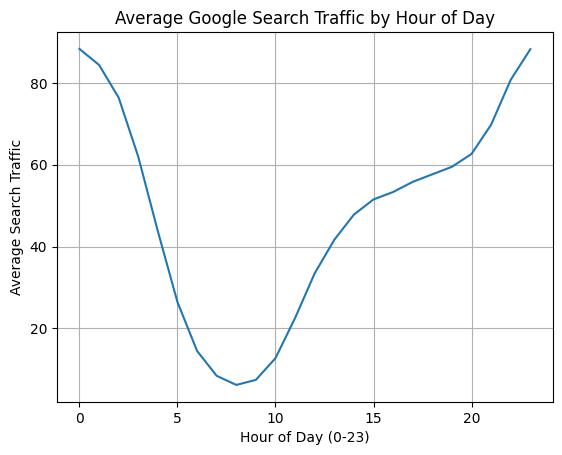

In [9]:
# Group the data by hour of day and calculate the average traffic
avg_traffic_by_hour = df_mercado_trends.groupby(df_mercado_trends.index.hour).mean()

# Plot the average traffic by hour of day
plt.figure(figsize=(12, 6))
avg_traffic_by_hour.plot(kind='line', legend=False)
plt.title("Average Google Search Traffic by Hour of Day")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Average Search Traffic")
plt.grid()
plt.show()




#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

<Figure size 1000x600 with 0 Axes>

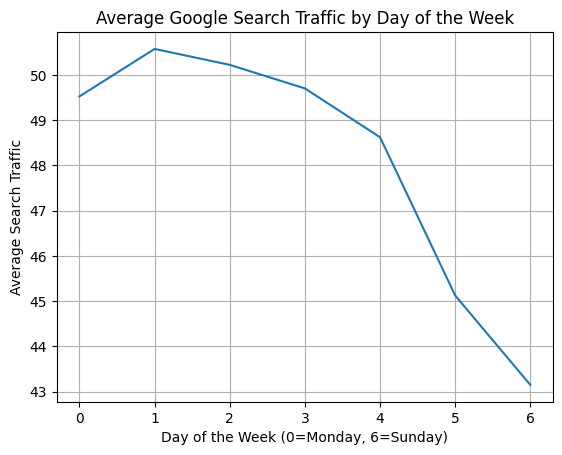

In [10]:
# Group the data by day of the week and calculate the average traffic
avg_traffic_by_day = df_mercado_trends.groupby(df_mercado_trends.index.dayofweek).mean()

# Plot the average traffic by day of week
plt.figure(figsize=(10, 6))
avg_traffic_by_day.plot(kind='line', legend=False)
plt.title("Average Google Search Traffic by Day of the Week")
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Average Search Traffic")
plt.grid()
plt.show()




#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

<Figure size 1200x600 with 0 Axes>

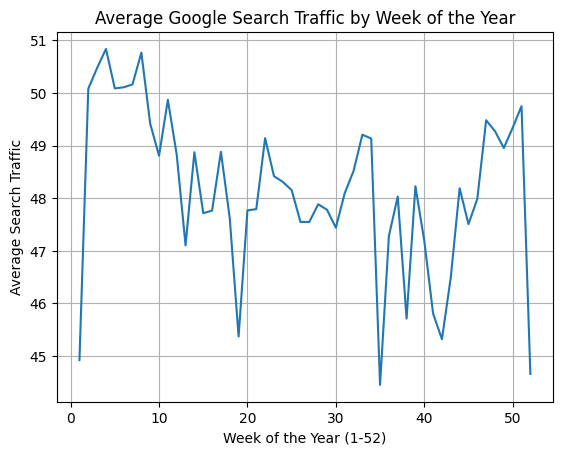

In [11]:
# Group the hourly search data to plot the average traffic by the week of the year using `df.index.isocalendar().week`.
# Group the data by week of the year and calculate the average traffic
avg_traffic_by_week = df_mercado_trends.groupby(df_mercado_trends.index.isocalendar().week).mean()

# Plot the average traffic by week of the year
plt.figure(figsize=(12, 6))
avg_traffic_by_week.plot(kind='line', legend=False)
plt.title("Average Google Search Traffic by Week of the Year")
plt.xlabel("Week of the Year (1-52)")
plt.ylabel("Average Search Traffic")
plt.grid()
plt.show()



##### Answer the following question:

**Question:** Are there any time based trends that you can see in the data?

**Answer:** Yes, the data reveals several time-based trends:

By Hour of the Day: Search traffic is highest late at night and early in the morning, peaking around midnight. It then declines steadily, reaching a low point around 5–6 AM. After this, traffic gradually increases throughout the day, rising again in the evening. This pattern suggests that users are more active online late at night and in the evening.

By Day of the Week: The average search traffic is highest at the start of the week, particularly on Monday and Tuesday. Traffic then gradually declines as the week progresses, with the lowest traffic observed on Saturdays and Sundays. This trend indicates that interest in the company may be higher during the workweek, possibly related to professional or financial activities that users engage in on weekdays.

By Week of the Year: Search traffic fluctuates throughout the year but shows increased activity during certain weeks, such as the early part of the year (around weeks 1–5) and towards the end of the year (weeks 40–52). This seasonal trend may indicate heightened interest during periods typically associated with financial reporting, holidays, or other significant events.

These patterns suggest predictable periods of increased interest that could be leveraged for targeted marketing to maximize reach and ROI.


## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [12]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


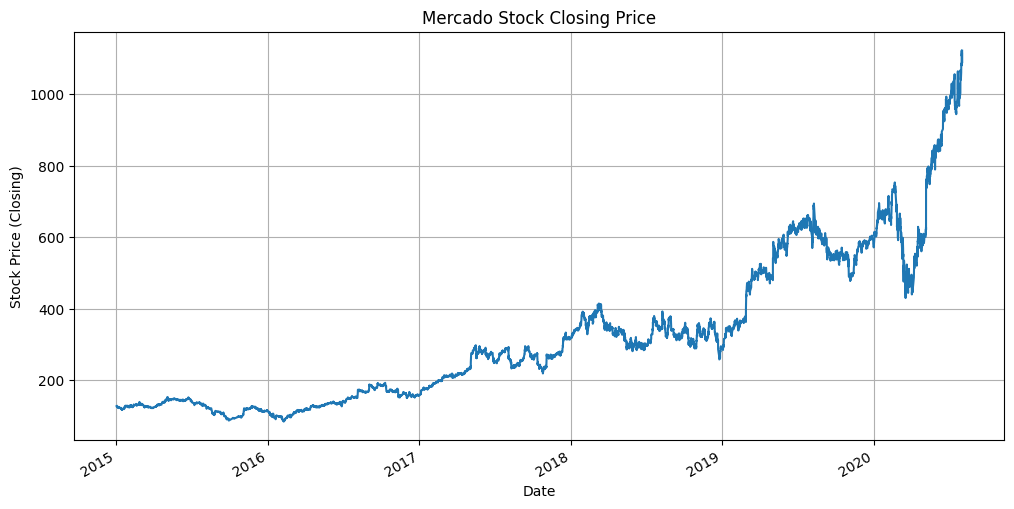

In [13]:
# Visualize the closing price of the df_mercado_stock DataFrame
df_mercado_stock['close'].plot(figsize=(12, 6), title="Mercado Stock Closing Price")
plt.xlabel("Date")
plt.ylabel("Stock Price (Closing)")
plt.grid()
plt.show()

In [14]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data

df_combined = pd.concat([df_mercado_trends, df_mercado_stock], axis=1).dropna()

# View the first and last five rows of the DataFrame
display(df_combined.head())
display(df_combined.tail())


,Search Trends,close
2016-06-01 09:00:00,6.0,135.16
2016-06-01 10:00:00,12.0,136.63
2016-06-01 11:00:00,22.0,136.56
2016-06-01 12:00:00,33.0,136.42
2016-06-01 13:00:00,40.0,136.10


,Search Trends,close
2020-07-31 11:00:00,20.0,1105.780
2020-07-31 12:00:00,32.0,1087.925
2020-07-31 13:00:00,41.0,1095.800
2020-07-31 14:00:00,47.0,1110.650
2020-07-31 15:00:00,53.0,1122.510


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [15]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06)
first_half_2020 = df_combined.loc['2020-01-01':'2020-06-30']

# View the first and last five rows of first_half_2020 DataFrame
display(first_half_2020.head())
display(first_half_2020.tail())



,Search Trends,close
2020-01-02 09:00:00,9.0,601.085
2020-01-02 10:00:00,14.0,601.290
2020-01-02 11:00:00,25.0,615.410
2020-01-02 12:00:00,37.0,611.400
2020-01-02 13:00:00,50.0,611.830


,Search Trends,close
2020-06-30 11:00:00,17.0,976.17
2020-06-30 12:00:00,27.0,977.50
2020-06-30 13:00:00,37.0,973.23
2020-06-30 14:00:00,45.0,976.50
2020-06-30 15:00:00,51.0,984.93


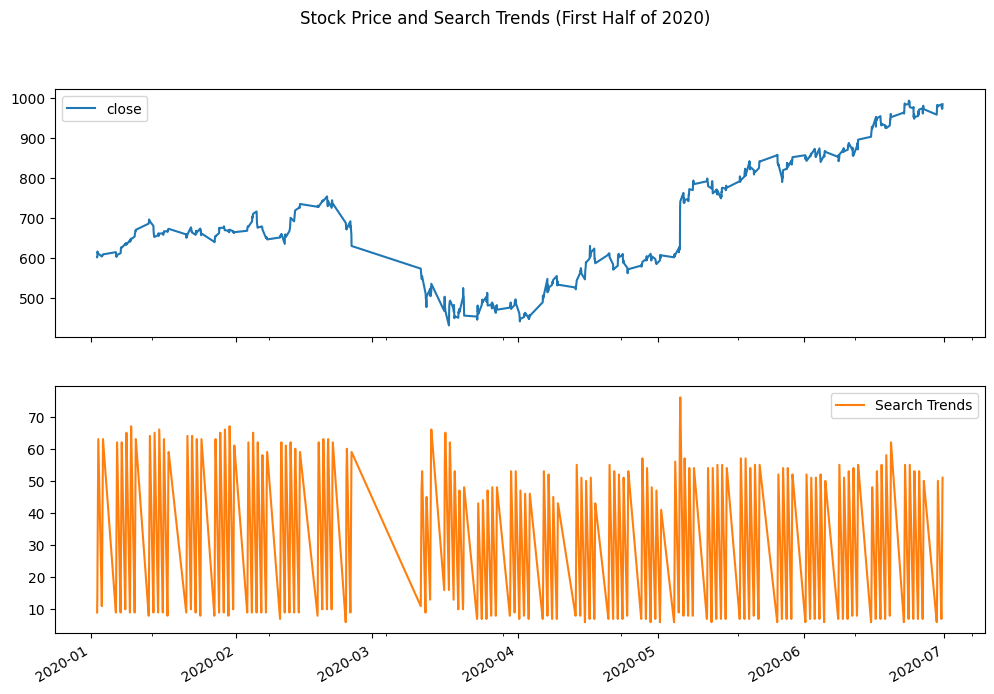

In [16]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `plot(subplots=True)`
first_half_2020[['close', 'Search Trends']].plot(subplots=True, figsize=(12, 8),
                                                 title="Stock Price and Search Trends (First Half of 2020)")
plt.show()

##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:** Yes, both time series indicate a trend consistent with the narrative. In the first half of 2020, there was a significant dip in both the stock price and search traffic, which aligns with the initial shock to global financial markets due to market events. This decline is visible in March, where both the stock price and search traffic experienced a noticeable drop.

After this initial decline, the stock price began a recovery and displayed a steady upward trend from April to June, reflecting an increase in new customers and revenue for e-commerce platforms, as mentioned in the narrative. Search traffic also showed an increase in May, suggesting heightened interest in the company around that time, likely linked to the company’s financial recovery and growth. This correlation between the recovery in search traffic and stock price supports the idea that market interest and company performance improved in response to increased demand for e-commerce during this period.

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [18]:
# Rename df_combined to mercado_stock_trends_df for clarity
mercado_stock_trends_df = df_combined


# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour

#Create the "Lagged Search Trends" column by shifting the "Search Trends" data by one hour
mercado_stock_trends_df['Lagged Search Trends'] = mercado_stock_trends_df['Search Trends'].shift(1)

# Check the data frequency to confirm it's hourly
print("Inferred frequency:", mercado_stock_trends_df.index.inferred_freq)  # Expected output: 'h' if data is hourly

# If the frequency isn't hourly, resample to an hourly basis before calculating returns
if mercado_stock_trends_df.index.inferred_freq != 'h':
    mercado_stock_trends_df = mercado_stock_trends_df.resample('h').ffill()  # Resample to hourly and forward fill


# Create a new column called "Hourly Stock Return" by calculating the percent change of the stock price on an hourly basis
mercado_stock_trends_df['Hourly Stock Return'] = mercado_stock_trends_df['close'].pct_change()

# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window

mercado_stock_trends_df['Stock Volatility'] = mercado_stock_trends_df['Hourly Stock Return'].rolling(window=4).std().ewm(span=4).mean()


# Create a new column called "Stock Volatility" which holds an exponentially weighted four-hour rolling average
# of the stock's volatility (standard deviation of "Hourly Stock Return")
mercado_stock_trends_df['Stock Volatility'] = mercado_stock_trends_df['close'].pct_change().rolling(window=4).std().ewm(span=4).mean()

# View the first few rows to verify the new columns
display(mercado_stock_trends_df.head())


Inferred frequency: None


,Search Trends,close,Lagged Search Trends,Hourly Stock Return,Stock Volatility
2016-06-01 09:00:00,6.0,135.16,NaN,NaN,NaN
2016-06-01 10:00:00,12.0,136.63,6.0,0.010876,NaN
2016-06-01 11:00:00,22.0,136.56,12.0,-0.000512,NaN
2016-06-01 12:00:00,33.0,136.42,22.0,-0.001025,NaN
2016-06-01 13:00:00,40.0,136.10,33.0,-0.002346,0.006134


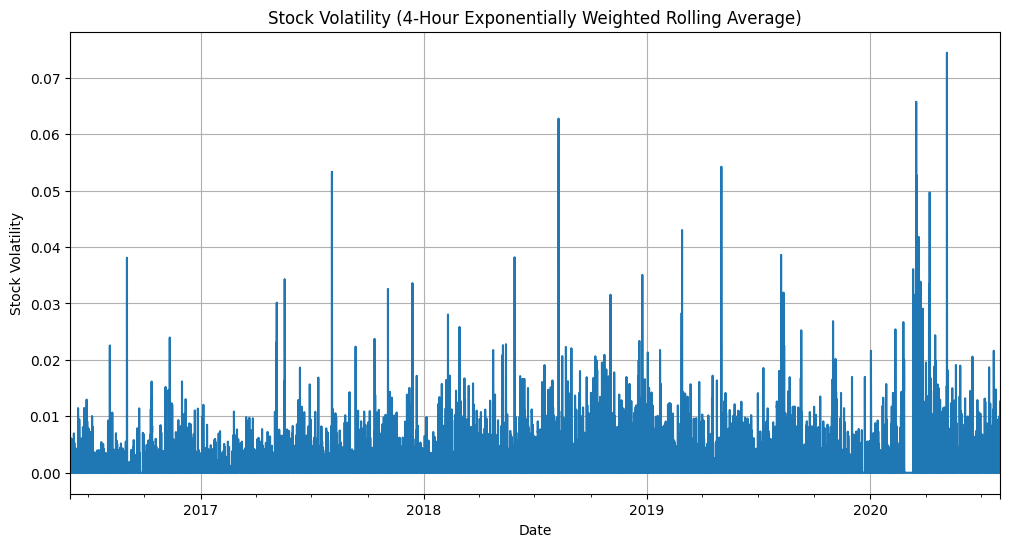

In [19]:
# Visualize the stock volatility

mercado_stock_trends_df['Stock Volatility'].plot(figsize=(12, 6), title="Stock Volatility (4-Hour Exponentially Weighted Rolling Average)")
plt.xlabel("Date")
plt.ylabel("Stock Volatility")
plt.grid()
plt.show()

**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [20]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price
mercado_stock_trends_df['Hourly Stock Return'] = mercado_stock_trends_df['close'].pct_change()


In [21]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
display(mercado_stock_trends_df.head())
display(mercado_stock_trends_df.tail())

,Search Trends,close,Lagged Search Trends,Hourly Stock Return,Stock Volatility
2016-06-01 09:00:00,6.0,135.16,NaN,NaN,NaN
2016-06-01 10:00:00,12.0,136.63,6.0,0.010876,NaN
2016-06-01 11:00:00,22.0,136.56,12.0,-0.000512,NaN
2016-06-01 12:00:00,33.0,136.42,22.0,-0.001025,NaN
2016-06-01 13:00:00,40.0,136.10,33.0,-0.002346,0.006134


,Search Trends,close,Lagged Search Trends,Hourly Stock Return,Stock Volatility
2020-07-31 11:00:00,20.0,1105.780,11.0,0.006380,0.007476
2020-07-31 12:00:00,32.0,1087.925,20.0,-0.016147,0.009905
2020-07-31 13:00:00,41.0,1095.800,32.0,0.007239,0.011261
2020-07-31 14:00:00,47.0,1110.650,41.0,0.013552,0.011957
2020-07-31 15:00:00,53.0,1122.510,47.0,0.010678,0.012601


#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [22]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
correlation_table = mercado_stock_trends_df[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()

# Display the correlation table
print("Correlation Table:")
display(correlation_table)

Correlation Table:


,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.334698,0.025023
Lagged Search Trends,-0.334698,1.000000,-0.004633
Hourly Stock Return,0.025023,-0.004633,1.000000


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:** No, the data does not indicate a predictable relationship between lagged search traffic and stock volatility or between lagged search traffic and hourly stock returns. The weak correlation of -0.335 between lagged search traffic and stock volatility, along with the near-zero correlation of -0.005 with stock returns, suggests that changes in search traffic do not reliably predict or influence these stock metrics.

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [23]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
prophet_df = df_mercado_trends.reset_index()

# Label the columns ds and y so that the syntax is recognized by Prophet
prophet_df = prophet_df.rename(columns={'Date': 'ds', 'Search Trends': 'y'})

# Drop an NaN values from the prophet_df DataFrame
prophet_df = prophet_df.dropna()

# View the first and last five rows of the mercado_prophet_df DataFrame
display(prophet_df.head())
display(prophet_df.tail())


,ds,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38


,ds,y
37101,2020-09-07 20:00:00,71
37102,2020-09-07 21:00:00,83
37103,2020-09-07 22:00:00,96
37104,2020-09-07 23:00:00,97
37105,2020-09-08 00:00:00,96


In [25]:
# Call the Prophet function, store as an object

from prophet import Prophet

model = Prophet()


In [26]:
# Fit the time-series model.
model.fit(prophet_df)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgi8vsd_0/u7yk8d08.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgi8vsd_0/nc0bss03.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52641', 'data', 'file=/tmp/tmpgi8vsd_0/u7yk8d08.json', 'init=/tmp/tmpgi8vsd_0/nc0bss03.json', 'output', 'file=/tmp/tmpgi8vsd_0/prophet_modelq3oc3zg6/prophet_model-20241103225621.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:56:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:56:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [27]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future_mercado_trends = model.make_future_dataframe(periods=2000, freq='h')

# View the last five rows of the future_mercado_trends DataFrame
display(future_mercado_trends.tail())


,ds
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00
39105,2020-11-30 08:00:00


In [28]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast_mercado_trends = model.predict(future_mercado_trends)


# Display the first five rows of the forecast_mercado_trends DataFrame
display(forecast_mercado_trends.head())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.469500,80.764228,98.445048,44.469500,44.469500,45.159722,45.159722,45.159722,41.452703,...,1.860594,1.860594,1.860594,1.846426,1.846426,1.846426,0.0,0.0,0.0,89.629222
1,2016-06-01 01:00:00,44.470406,77.899206,94.614177,44.470406,44.470406,41.605529,41.605529,41.605529,37.943556,...,1.810498,1.810498,1.810498,1.851474,1.851474,1.851474,0.0,0.0,0.0,86.075935
2,2016-06-01 02:00:00,44.471312,68.338484,84.216190,44.471312,44.471312,31.282049,31.282049,31.282049,27.656646,...,1.768912,1.768912,1.768912,1.856491,1.856491,1.856491,0.0,0.0,0.0,75.753361
3,2016-06-01 03:00:00,44.472218,52.037205,68.789271,44.472218,44.472218,16.014826,16.014826,16.014826,12.417424,...,1.735926,1.735926,1.735926,1.861476,1.861476,1.861476,0.0,0.0,0.0,60.487045
4,2016-06-01 04:00:00,44.473124,35.177921,51.989938,44.473124,44.473124,-1.100073,-1.100073,-1.100073,-4.677999,...,1.711496,1.711496,1.711496,1.866430,1.866430,1.866430,0.0,0.0,0.0,43.373051


#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

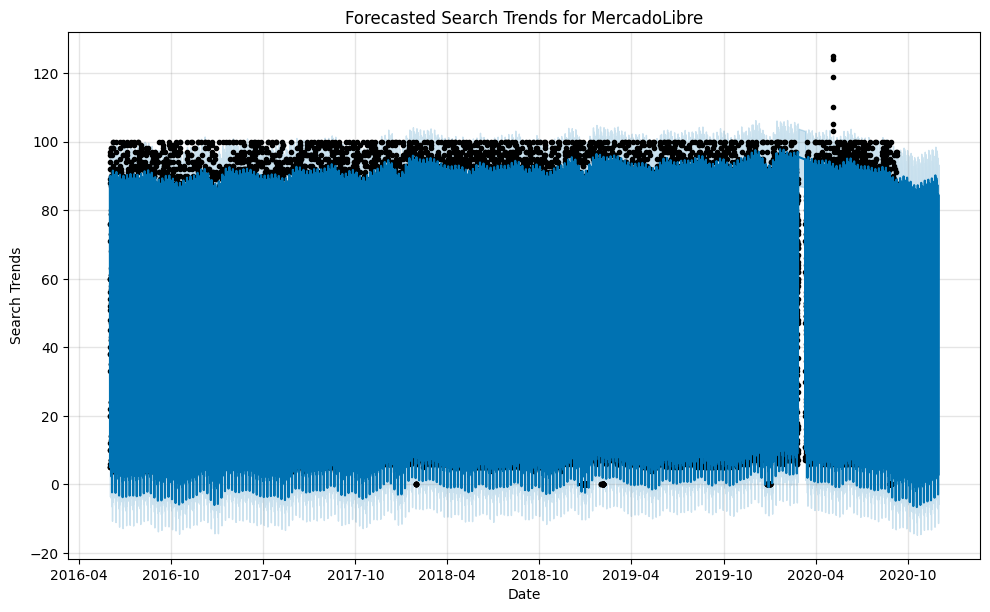

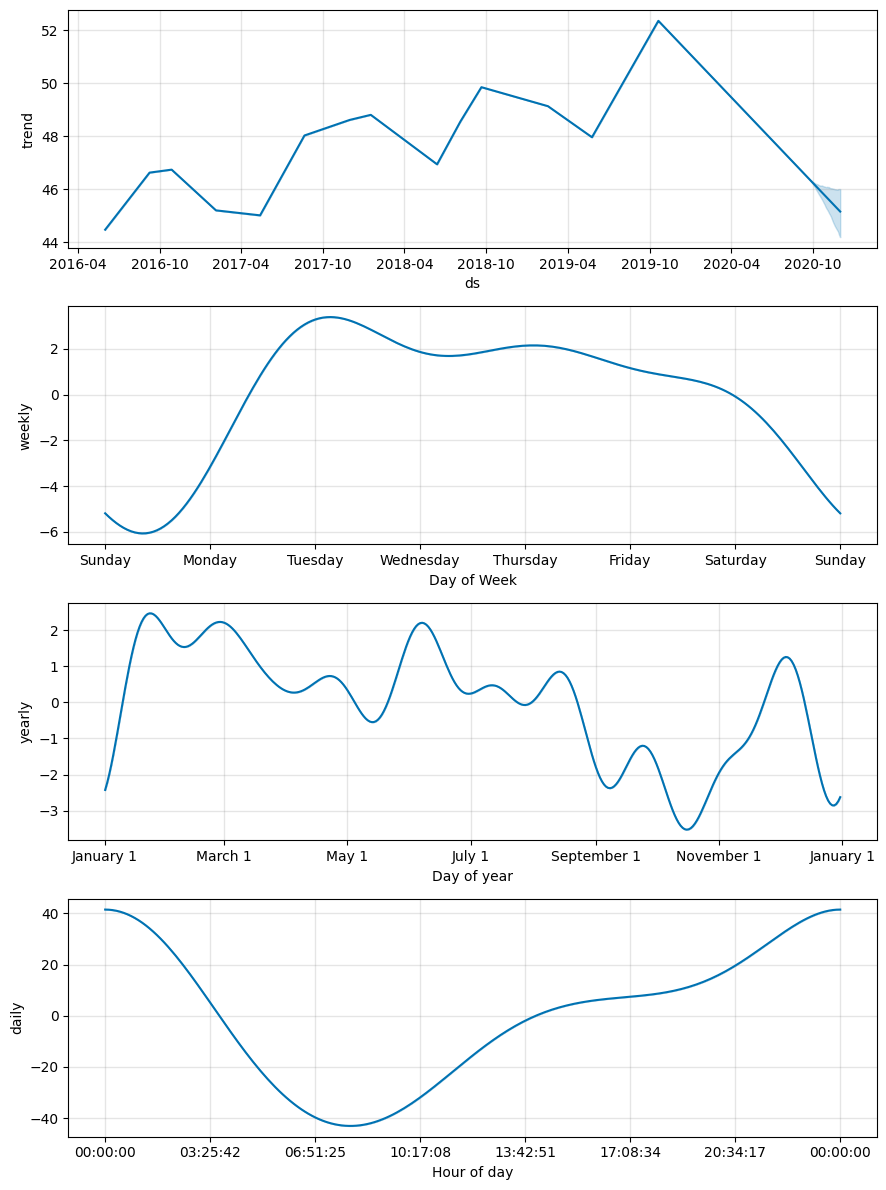

In [29]:
# Plot the Prophet predictions for the Mercado trends data

model.plot(forecast_mercado_trends)
plt.title("Forecasted Search Trends for MercadoLibre")
plt.xlabel("Date")
plt.ylabel("Search Trends")
plt.show()

# Plot the individual time series components of the model to analyze daily and weekly trends
model.plot_components(forecast_mercado_trends)
plt.show()


##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:**

The near-term forecast for MercadoLibre's popularity appears relatively stable, with search trends remaining within a consistent range without significant upward or downward trends. The forecasted trend line in the plot shows that search interest is expected to maintain a similar pattern as in previous periods, without substantial spikes or declines.

While there are some fluctuations within a narrow band, no dramatic increases or decreases in popularity are anticipated in the near future according to the model. This suggests that search interest for MercadoLibre is stable in the short term, without clear signs of major shifts.

#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [30]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast_mercado_trends = forecast_mercado_trends.set_index('ds')

# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
lim_forecast_mercado_trends = forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']]

display(lim_forecast_mercado_trends.head())


,yhat,yhat_lower,yhat_upper
ds,,,
2016-06-01 00:00:00,89.629222,80.764228,98.445048
2016-06-01 01:00:00,86.075935,77.899206,94.614177
2016-06-01 02:00:00,75.753361,68.338484,84.216190
2016-06-01 03:00:00,60.487045,52.037205,68.789271
2016-06-01 04:00:00,43.373051,35.177921,51.989938


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

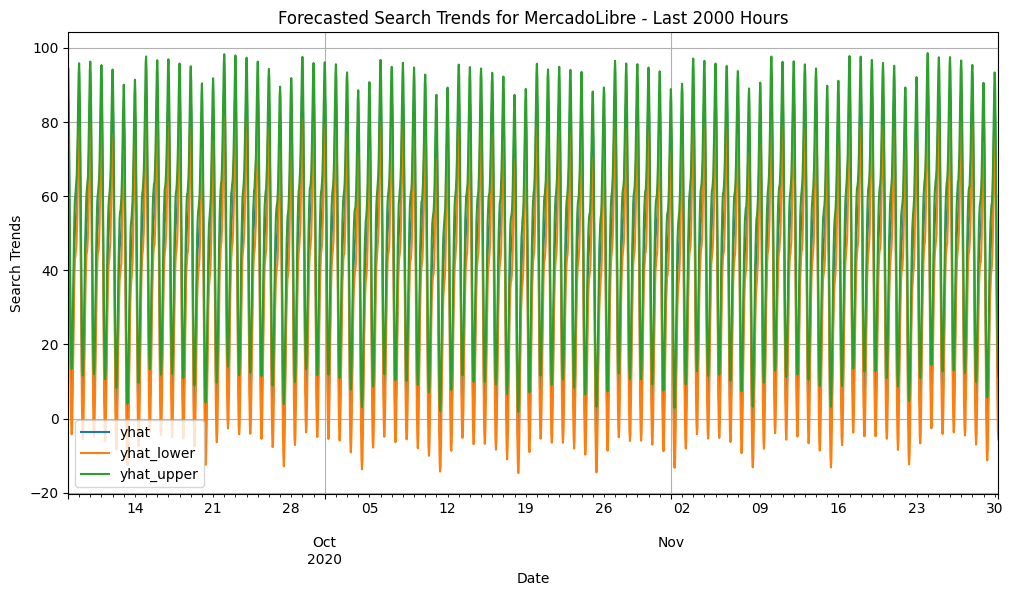

In [31]:
# From the forecast_mercado_trends DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours

lim_forecast_mercado_trends.tail(2000).plot(figsize=(12, 6))
plt.title("Forecasted Search Trends for MercadoLibre - Last 2000 Hours")
plt.xlabel("Date")
plt.ylabel("Search Trends")
plt.grid()
plt.show()

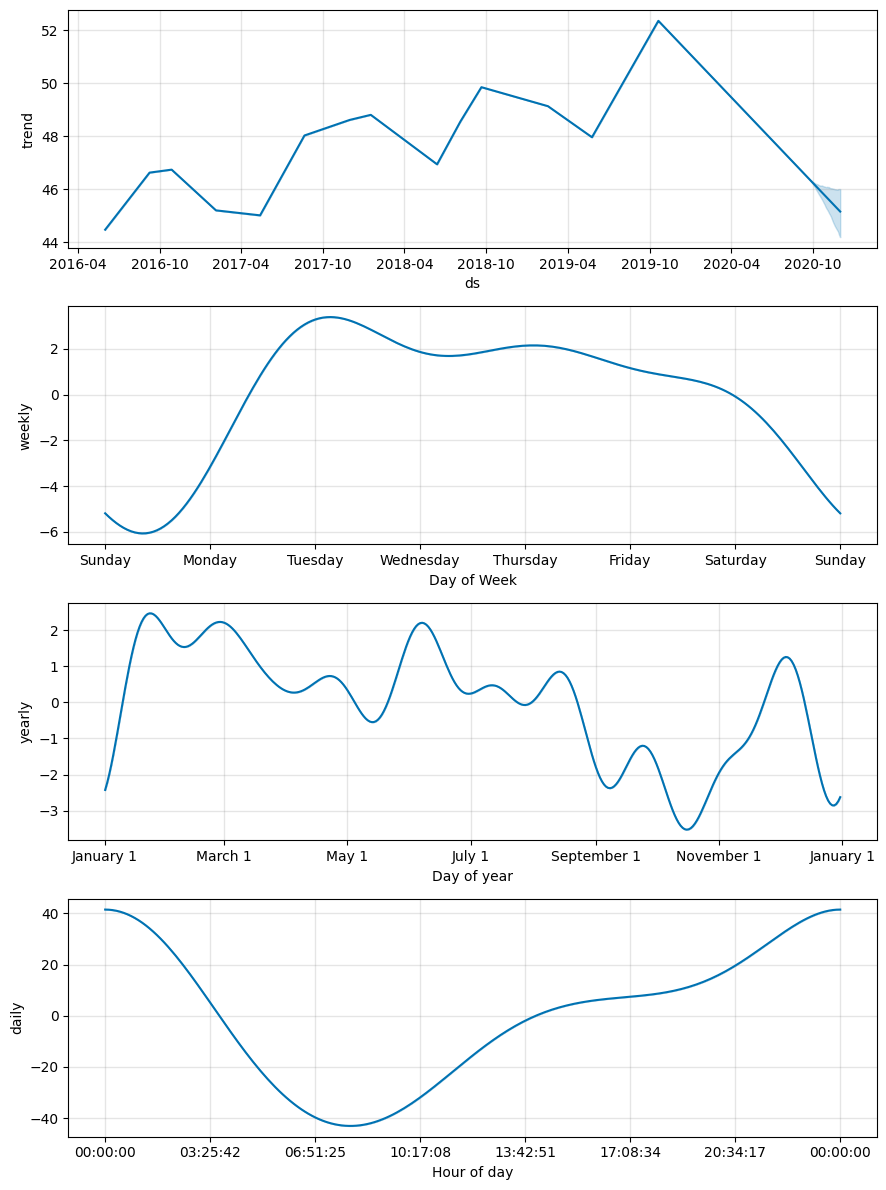

In [32]:
# Reset the index in the forecast_mercado_trends DataFrame

forecast_mercado_trends = forecast_mercado_trends.reset_index()

# Use the plot_components function to visualize the forecast results
# for the forecast_mercado_trends DataFrame

model.plot_components(forecast_mercado_trends)
plt.show()


##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:**

According to the daily component plot, the time of day with the greatest popularity is around midnight (00:00), when search traffic peaks. This suggests that users are most active in searching for MercadoLibre around midnight.

**Question:** Which day of week gets the most search traffic?
   
**Answer:**

The weekly component plot shows that Tuesday has the highest search traffic. This indicates that users tend to search for MercadoLibre most frequently on Tuesdays.

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:**

Based on the yearly component plot, the lowest point for search traffic occurs around late September. This suggests a seasonal dip in search interest during this time of year.